In [1]:
import pandas as pd
import glob
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,matthews_corrcoef,cohen_kappa_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# setting the path for joining multiple nuetralfiles


files=os.path.join("E://Delaware//neutral1","DPD_1_*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)


Resultant CSV after joining all CSV files at a particular location...
     face   confidence   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r  \
0       0        0.975     1.27     1.11     0.09     0.21      0.0     0.00   
1       0        0.975     0.00     0.34     0.00     0.45      0.0     0.88   
2       0        0.975     1.71     1.51     1.21     0.00      0.0     0.73   
3       0        0.975     0.70     1.14     0.37     0.23      0.0     1.65   
4       0        0.975     0.00     0.00     0.37     0.21      0.0     0.00   
..    ...          ...      ...      ...      ...      ...      ...      ...   
257     0        0.975     0.43     0.50     0.47     0.08      0.0     0.00   
258     0        0.975     1.13     0.18     0.85     0.00      0.0     0.73   
259     0        0.975     0.00     0.00     0.00     0.10      0.0     0.00   
260     0        0.975     0.67     0.11     0.00     0.60      0.0     0.00   
261     0        0.975     0.52     0.52     0.00 

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.975,1.27,1.11,0.09,0.21,0.0,0.00,0.0,0.49,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.975,0.00,0.34,0.00,0.45,0.0,0.88,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.975,1.71,1.51,1.21,0.00,0.0,0.73,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.975,0.70,1.14,0.37,0.23,0.0,1.65,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.975,0.00,0.00,0.37,0.21,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0.975,0.43,0.50,0.47,0.08,0.0,0.00,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
258,0,0.975,1.13,0.18,0.85,0.00,0.0,0.73,0.0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
259,0,0.975,0.00,0.00,0.00,0.10,0.0,0.00,0.0,0.00,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
260,0,0.975,0.67,0.11,0.00,0.60,0.0,0.00,0.0,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_neutral=df.iloc[:, 2:38]

In [6]:
df_neutral

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1.27,1.11,0.09,0.21,0.0,0.00,0.0,0.49,0.22,1.57,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.34,0.00,0.45,0.0,0.88,0.0,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.71,1.51,1.21,0.00,0.0,0.73,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.70,1.14,0.37,0.23,0.0,1.65,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.37,0.21,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.43,0.50,0.47,0.08,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
258,1.13,0.18,0.85,0.00,0.0,0.73,0.0,0.00,0.00,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
259,0.00,0.00,0.00,0.10,0.0,0.00,0.0,0.00,0.31,1.18,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
260,0.67,0.11,0.00,0.60,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df_neutral.insert(0, 'class', '0')
print(df_neutral)

    class   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r   AU09_r  \
0       0     1.27     1.11     0.09     0.21      0.0     0.00      0.0   
1       0     0.00     0.34     0.00     0.45      0.0     0.88      0.0   
2       0     1.71     1.51     1.21     0.00      0.0     0.73      0.0   
3       0     0.70     1.14     0.37     0.23      0.0     1.65      0.0   
4       0     0.00     0.00     0.37     0.21      0.0     0.00      0.0   
..    ...      ...      ...      ...      ...      ...      ...      ...   
257     0     0.43     0.50     0.47     0.08      0.0     0.00      0.0   
258     0     1.13     0.18     0.85     0.00      0.0     0.73      0.0   
259     0     0.00     0.00     0.00     0.10      0.0     0.00      0.0   
260     0     0.67     0.11     0.00     0.60      0.0     0.00      0.0   
261     0     0.52     0.52     0.00     0.00      0.0     0.00      0.0   

      AU10_r   AU12_r  ...   AU12_c   AU14_c   AU15_c   AU17_c   AU20_c  \
0       0.49

In [8]:
# setting the path for joining pain multiple files

#files=os.path.join("E:\OpenFace_2.2.0_win_x86\OpenFace_2.2.0_win_x86\processed","DPD_1_A****.csv")
files1=os.path.join("E://Delaware//pain","DPD_1_*.csv")


# list of merged files returned
files1 = glob.glob(files1)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df1 = pd.concat(map(pd.read_csv, files1), ignore_index=True)
print(df1)


Resultant CSV after joining all CSV files at a particular location...
     face   confidence   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r  \
0       0        0.975     1.54     1.12     0.00     0.67     0.00     1.20   
1       0        0.975     0.69     1.35     0.00     0.74     0.00     0.55   
2       0        0.975     1.30     0.97     0.09     0.00     0.00     0.75   
3       0        0.975     2.19     1.83     1.65     0.00     0.00     0.71   
4       0        0.975     0.07     0.59     0.76     0.00     1.90     1.43   
..    ...          ...      ...      ...      ...      ...      ...      ...   
650     0        0.975     0.37     0.00     1.76     0.00     0.56     1.28   
651     0        0.975     0.62     0.00     0.74     0.00     0.42     0.87   
652     0        0.975     0.83     0.00     1.68     0.00     0.56     1.08   
653     0        0.975     0.36     0.00     1.18     0.00     2.04     1.60   
654     0        0.975     0.00     0.00     0.00 

In [9]:
df1

,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.975,1.54,1.12,0.00,0.67,0.00,1.20,0.00,0.44,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0,0.975,0.69,1.35,0.00,0.74,0.00,0.55,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0.975,1.30,0.97,0.09,0.00,0.00,0.75,0.00,0.18,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0,0.975,2.19,1.83,1.65,0.00,0.00,0.71,0.00,0.00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,0.975,0.07,0.59,0.76,0.00,1.90,1.43,0.32,1.76,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0,0.975,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,0,0.975,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,0,0.975,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,0,0.975,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [10]:
df_pain=df1.iloc[:, 2:38] 

In [11]:
df_pain

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1.54,1.12,0.00,0.67,0.00,1.20,0.00,0.44,0.00,0.89,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.69,1.35,0.00,0.74,0.00,0.55,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.30,0.97,0.09,0.00,0.00,0.75,0.00,0.18,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,2.19,1.83,1.65,0.00,0.00,0.71,0.00,0.00,0.14,1.22,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.07,0.59,0.76,0.00,1.90,1.43,0.32,1.76,1.42,0.76,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,2.85,2.00,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [12]:
df_pain.insert(0, 'class', '1')
print(df_pain)

    class   AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r   AU09_r  \
0       1     1.54     1.12     0.00     0.67     0.00     1.20     0.00   
1       1     0.69     1.35     0.00     0.74     0.00     0.55     0.00   
2       1     1.30     0.97     0.09     0.00     0.00     0.75     0.00   
3       1     2.19     1.83     1.65     0.00     0.00     0.71     0.00   
4       1     0.07     0.59     0.76     0.00     1.90     1.43     0.32   
..    ...      ...      ...      ...      ...      ...      ...      ...   
650     1     0.37     0.00     1.76     0.00     0.56     1.28     1.26   
651     1     0.62     0.00     0.74     0.00     0.42     0.87     1.06   
652     1     0.83     0.00     1.68     0.00     0.56     1.08     1.27   
653     1     0.36     0.00     1.18     0.00     2.04     1.60     0.00   
654     1     0.00     0.00     0.00     0.10     0.84     0.54     0.01   

      AU10_r   AU12_r  ...   AU12_c   AU14_c   AU15_c   AU17_c   AU20_c  \
0       0.44

In [13]:
df_pain

,class,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,1.54,1.12,0.00,0.67,0.00,1.20,0.00,0.44,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,1,0.69,1.35,0.00,0.74,0.00,0.55,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,1.30,0.97,0.09,0.00,0.00,0.75,0.00,0.18,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,1,2.19,1.83,1.65,0.00,0.00,0.71,0.00,0.00,0.14,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0.07,0.59,0.76,0.00,1.90,1.43,0.32,1.76,1.42,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,1,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,1,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,1,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,2.85,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [14]:
data = [df_neutral, df_pain]
  
dataset = pd.concat(data)
display(dataset)

,class,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,1.27,1.11,0.09,0.21,0.00,0.00,0.00,0.49,0.22,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.00,0.34,0.00,0.45,0.00,0.88,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.71,1.51,1.21,0.00,0.00,0.73,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.70,1.14,0.37,0.23,0.00,1.65,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.00,0.00,0.37,0.21,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1,0.37,0.00,1.76,0.00,0.56,1.28,1.26,0.69,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
651,1,0.62,0.00,0.74,0.00,0.42,0.87,1.06,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
652,1,0.83,0.00,1.68,0.00,0.56,1.08,1.27,0.22,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,1,0.36,0.00,1.18,0.00,2.04,1.60,0.00,0.55,2.85,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [15]:
final= dataset.sample(frac = 1)

In [16]:
final

,class,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
20,0,0.87,1.10,0.82,0.69,0.00,0.00,0.00,0.00,0.18,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
312,1,1.59,0.00,1.93,0.00,2.59,3.52,0.44,1.83,2.62,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
255,0,0.71,0.00,0.46,0.43,0.00,0.77,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0,0.00,1.02,0.00,0.00,0.00,0.44,0.59,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
512,1,0.88,0.95,0.42,1.20,0.02,1.98,0.18,0.42,0.11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,0.00,0.00,1.17,0.00,1.93,2.78,2.32,1.38,1.06,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
468,1,0.25,0.00,1.00,0.00,0.59,2.59,0.28,0.00,0.00,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
580,1,1.65,2.87,0.00,2.54,1.30,1.24,1.50,2.45,2.95,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
33,1,0.14,1.09,0.00,0.00,2.39,1.56,1.78,2.17,1.80,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
x= final.drop('class', axis = 1) # Features variables
y= final['class'] # Target variable

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(
    x,y, test_size=0.25, random_state=0)

In [22]:
x_train

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
100,0.00,0.00,0.96,0.56,1.08,4.42,2.07,0.00,0.00,0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
554,0.00,0.00,0.91,0.00,2.53,1.80,2.35,1.88,1.31,0.42,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
647,0.00,0.00,0.13,0.40,3.19,3.12,0.43,1.83,3.07,2.28,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
222,0.90,0.02,1.89,0.00,0.55,2.38,1.20,0.65,0.14,1.91,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
340,0.15,0.00,4.38,0.00,2.59,4.97,2.20,1.61,1.83,1.86,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1.06,0.28,0.48,0.37,0.65,0.00,0.00,1.62,1.42,1.06,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
21,0.41,0.00,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
57,0.00,0.00,1.92,0.27,1.68,2.24,1.06,1.48,0.35,1.84,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
174,1.07,0.86,0.00,0.73,0.21,1.54,0.00,0.00,1.65,0.96,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
x_test

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
262,0.75,0.00,1.39,0.66,0.72,3.48,1.34,1.30,0.00,0.60,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
160,0.14,0.00,0.00,0.00,3.42,3.34,1.42,2.84,3.56,2.68,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
265,1.09,0.00,0.37,0.00,1.12,2.42,0.37,0.00,0.00,0.52,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.30,0.97,0.09,0.00,0.00,0.75,0.00,0.18,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
257,0.89,0.00,1.13,0.32,0.75,3.13,1.54,1.33,0.00,0.75,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1.92,1.77,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
204,1.28,1.74,0.00,0.51,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1.07,0.83,0.00,1.17,2.40,2.20,0.97,2.14,2.50,1.10,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
318,0.00,0.00,0.83,0.00,1.80,1.80,1.00,2.28,2.72,2.69,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
y_train

100    1
554    1
647    1
222    1
340    1
      ..
408    1
21     0
57     1
174    0
98     1
Name: class, Length: 687, dtype: object

In [26]:
y_test

262    1
160    1
265    1
2      1
257    1
      ..
110    0
204    0
30     1
318    1
280    1
Name: class, Length: 230, dtype: object

In [27]:
Log_model = LogisticRegression().fit(x_train,y_train)
tree_model = DecisionTreeClassifier().fit(x_train,y_train)
random_model = RandomForestClassifier().fit(x_train,y_train)
extra_model = ExtraTreesClassifier().fit(x_train,y_train)

xgb_model = XGBClassifier().fit(x_train,y_train)
KNN_model = KNeighborsClassifier().fit(x_train,y_train)

[11:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [37]:
def evaluate_classification_model(model,x_test,y_test):
    pred = model.predict(x_test)
    print("Accuarcy Score : ",accuracy_score(y_test,pred))
    print("Auc score : ",roc_auc_score(y_test,pred))
    print("Recall Score : ",recall_score(y_test,pred))
    print("Precision Score : ",precision_score(y_test,pred))
    print("F1 Score : ",f1_score(y_test,pred))
    print("Kappa Score : ",cohen_kappa_score(y_test,pred))
    print("MCC Score : ",matthews_corrcoef(y_test,pred))

In [38]:
from pycaret.classification import *

In [39]:
clf=setup(data=final,target='class')

,Description,Value
0,session_id,6617
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(917, 36)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
models()


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Using cross validation strategy to compare different models

In [41]:
best_model = compare_models(fold =3, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9205,0.9767,0.9485,0.9428,0.9455,0.7983,0.7995,0.1967
lr,Logistic Regression,0.9407,0.9766,0.9527,0.9655,0.9589,0.8524,0.8534,2.1400
et,Extra Trees Classifier,0.9376,0.9760,0.9528,0.9611,0.9569,0.8442,0.8445,0.1533
lightgbm,Light Gradient Boosting Machine,0.9205,0.9748,0.9485,0.9428,0.9455,0.7982,0.7990,0.4367
knn,K Neighbors Classifier,0.9236,0.9735,0.9077,0.9860,0.9452,0.8195,0.8273,1.2467
gbc,Gradient Boosting Classifier,0.9173,0.9735,0.9442,0.9426,0.9432,0.7913,0.7925,0.1133
xgboost,Extreme Gradient Boosting,0.9220,0.9730,0.9463,0.9471,0.9463,0.8033,0.8052,0.1600
lda,Linear Discriminant Analysis,0.9205,0.9699,0.9206,0.9682,0.9438,0.8082,0.8112,0.0233
ada,Ada Boost Classifier,0.9173,0.9665,0.9485,0.9385,0.9434,0.7899,0.7903,0.0833
nb,Naive Bayes,0.9158,0.9655,0.9141,0.9683,0.9402,0.7977,0.8022,0.0167


In [46]:
model = create_model('lightgbm', fold = 3)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9019,0.9696,0.9419,0.9241,0.9329,0.7504,0.7508
1,0.9252,0.9791,0.9615,0.9375,0.9494,0.8066,0.8075
2,0.9343,0.9758,0.9419,0.9669,0.9542,0.8377,0.8386
Mean,0.9205,0.9748,0.9485,0.9428,0.9455,0.7982,0.7990
Std,0.0137,0.0039,0.0092,0.0179,0.0091,0.0361,0.0363


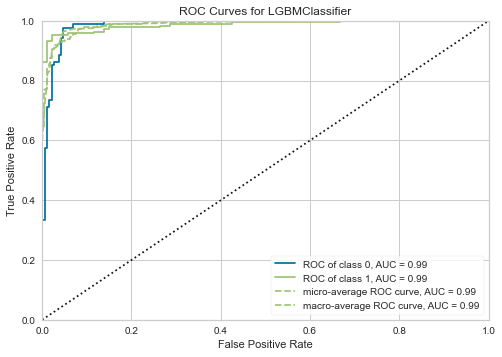

In [47]:
# Plotting auc curve
plot_model(model, plot = 'auc')

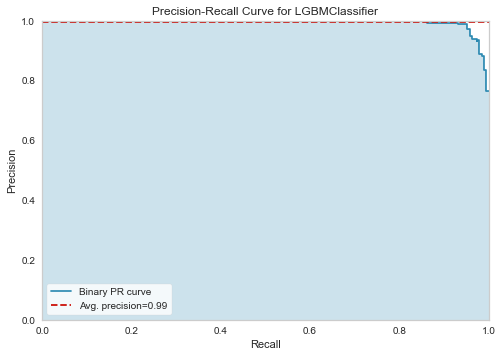

In [48]:
plot_model(model, plot='pr')

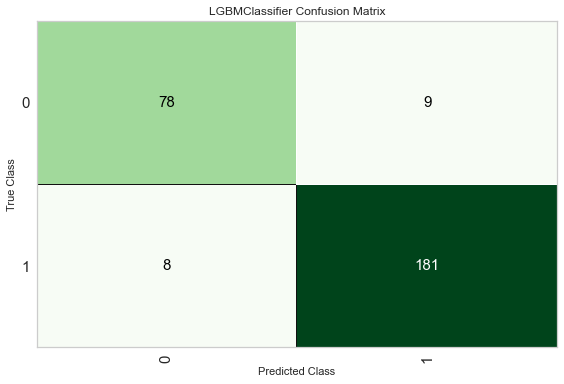

In [49]:
# Plotting confusion matrix
plot_model(model, plot='confusion_matrix')

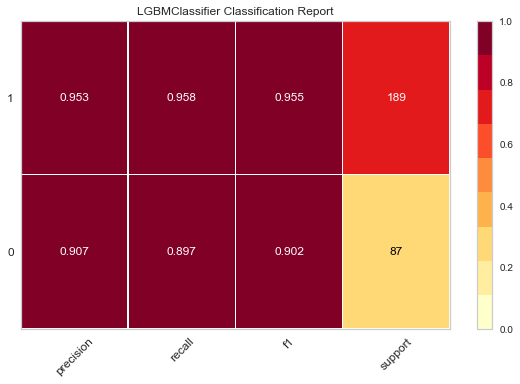

In [50]:
# Plotting classification report
plot_model(model, plot='class_report')

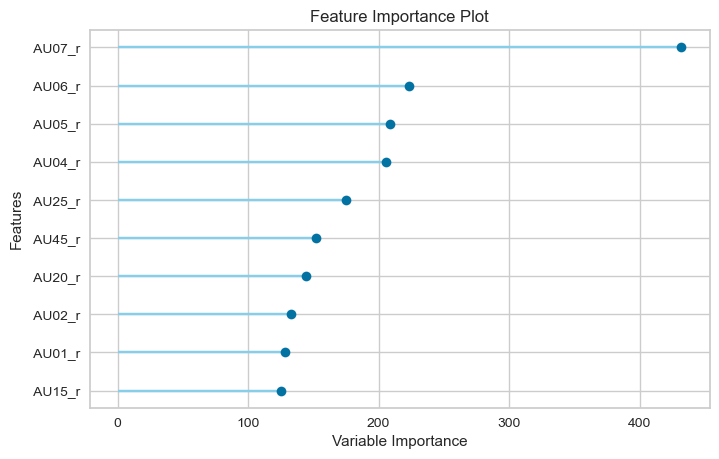

In [51]:
# Plotting feature importance
plot_model(model, plot='feature')

In [52]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

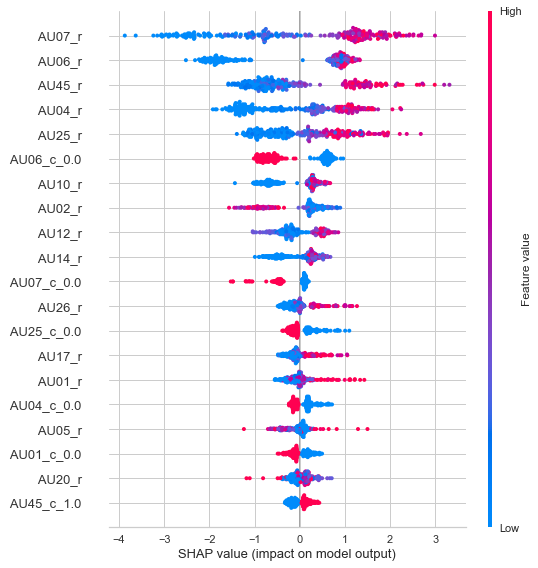

In [53]:
interpret_model(model)

In [54]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9384,0.9869,0.9577,0.9526,0.9551,0.8569,0.8569


,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU17_c_1.0,AU20_c_1.0,AU23_c_0.0,AU25_c_0.0,AU26_c_0.0,AU28_c_1.0,AU45_c_1.0,class,Label,Score
0,0.00,0.07,0.22,1.24,0.00,0.00,0.07,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0,0.9815
1,0.09,0.00,2.29,0.00,2.56,3.98,1.92,2.99,2.27,3.38,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,1.0000
2,1.04,0.05,0.52,0.00,0.40,1.78,0.37,0.00,0.00,0.17,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1,1,0.9997
3,1.01,0.73,1.98,0.00,2.46,2.31,1.31,1.75,2.19,3.43,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1,1,1.0000
4,0.39,0.00,2.37,0.00,2.65,4.21,2.14,2.33,2.86,1.70,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.42,0.00,0.21,0.00,2.19,2.58,1.88,1.04,0.90,1.49,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0.9997
272,0.25,0.46,0.00,0.00,1.13,0.68,0.79,0.71,1.22,1.06,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0.9995
273,0.33,1.16,0.00,0.00,0.00,0.89,0.00,0.00,0.00,0.06,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0.9927
274,1.44,0.00,3.44,0.52,0.80,3.22,1.24,0.87,0.93,1.39,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,1.0000


In [55]:
# We already have one model lightgbm (model), lets create two more models
xgboost = create_model('xgboost', fold =3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9159,0.9670,0.9484,0.9363,0.9423,0.7872,0.7874
1,0.9252,0.9767,0.9679,0.9321,0.9497,0.8044,0.8066
2,0.9249,0.9752,0.9226,0.9728,0.9470,0.8183,0.8217
Mean,0.9220,0.9730,0.9463,0.9471,0.9463,0.8033,0.8052
Std,0.0043,0.0043,0.0186,0.0183,0.0031,0.0127,0.0140


In [56]:
# Using blend function in pycaret
# model for lightgbm model
blended_model1 = blend_models(estimator_list = [model,xgboost], method = 'soft', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9112,0.9679,0.9419,0.9359,0.9389,0.7765,0.7766
1,0.9299,0.9796,0.9744,0.9325,0.9530,0.8156,0.8187
2,0.9390,0.9783,0.9419,0.9733,0.9574,0.8500,0.8515
Mean,0.9267,0.9752,0.9527,0.9472,0.9498,0.8141,0.8156
Std,0.0116,0.0052,0.0153,0.0185,0.0079,0.0300,0.0306


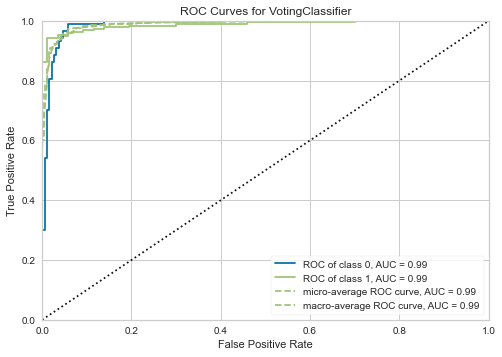

In [57]:
# Check plots for blended model
# Plotting auc curve
plot_model(blended_model1, plot = 'auc')

In [58]:
predict_model(blended_model1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9493,0.9875,0.9683,0.9581,0.9632,0.8818,0.8819


,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU17_c_1.0,AU20_c_1.0,AU23_c_0.0,AU25_c_0.0,AU26_c_0.0,AU28_c_1.0,AU45_c_1.0,class,Label,Score
0,0.00,0.07,0.22,1.24,0.00,0.00,0.07,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,0,0.9858
1,0.09,0.00,2.29,0.00,2.56,3.98,1.92,2.99,2.27,3.38,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0.9999
2,1.04,0.05,0.52,0.00,0.40,1.78,0.37,0.00,0.00,0.17,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1,1,0.9995
3,1.01,0.73,1.98,0.00,2.46,2.31,1.31,1.75,2.19,3.43,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1,1,1.0000
4,0.39,0.00,2.37,0.00,2.65,4.21,2.14,2.33,2.86,1.70,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.42,0.00,0.21,0.00,2.19,2.58,1.88,1.04,0.90,1.49,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0.9980
272,0.25,0.46,0.00,0.00,1.13,0.68,0.79,0.71,1.22,1.06,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0.9937
273,0.33,1.16,0.00,0.00,0.00,0.89,0.00,0.00,0.00,0.06,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0.9957
274,1.44,0.00,3.44,0.52,0.80,3.22,1.24,0.87,0.93,1.39,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.9999
